In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

380
Cantidad de pruebas para valor: 5


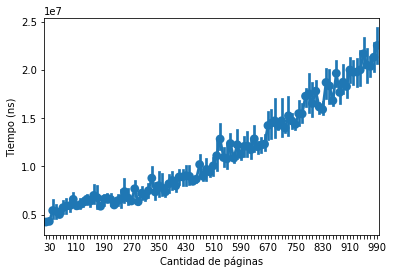

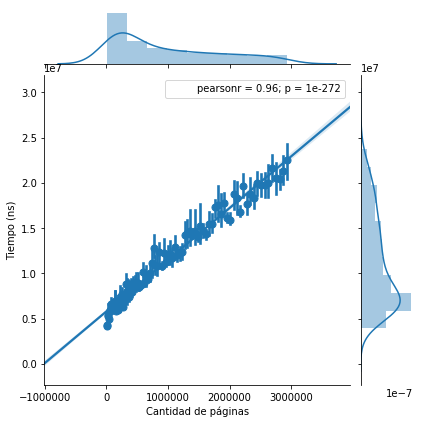

In [29]:
# Variar n dejando m fijo

df = pd.read_csv('resultados/random-var-n-m-fijo-data.csv', sep=',', engine='python')
# print(df)

m = df["m"][0]
print(m)
cant_pruebas = df["cant_intentos"][0]
ax = sns.pointplot(x="cant_nodos", y="tiempo_ns", data=df)
print("Cantidad de pruebas para valor: {}".format(cant_pruebas))
# ax.set_title("Tiempos variando #págs; #links={}".format(m))
plt.xlabel(r'Cantidad de páginas')
plt.ylabel(r'Tiempo (ns)')

# filtro puntos a mostrar sobre el eje horizontal
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 8 == 1:
        label.set_visible(True)
    else:
        label.set_visible(False)        

plt.savefig('img/tiempos-random-var-n-m-fijo.png')
plt.show()


df = pd.read_csv('resultados/random-var-n-m-fijo-data.csv', sep=',', engine='python')
df['cant_nodos'] = df['cant_nodos'].apply(lambda x: max((x**2)*math.log10(x), x*m*math.log10(x)))
sns.jointplot(df['cant_nodos'], df['tiempo_ns'], kind="reg", x_estimator=np.mean)
plt.xlabel(r'Cantidad de páginas')
plt.ylabel(r'Tiempo (ns)')
plt.savefig('img/tiempos-random-var-n-m-fijo-rlineal.png')
plt.show()




Cantidad de pruebas para valor: 20


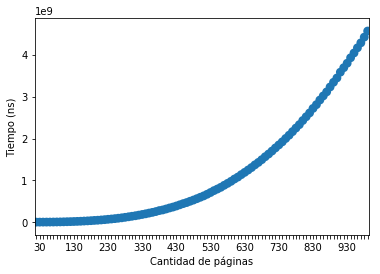

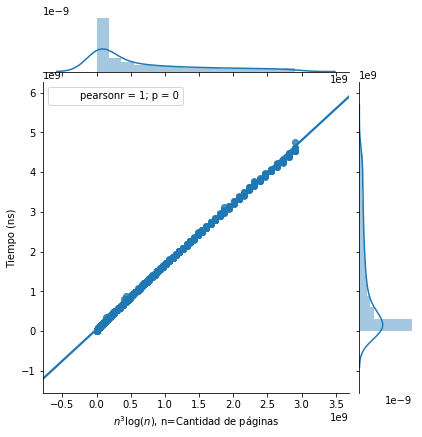

In [28]:
# Variar n ajustando m
df2 = pd.read_csv('resultados/random-var-n-m-ajustado-data.csv', sep=',', engine='python')
ax = sns.pointplot(x="cant_nodos", y="tiempo_ns", data=df2)
p_densidad = df2["p_densidad"][0]
cant_pruebas = df2["cant_intentos"][0]
print("Cantidad de pruebas para valor: {}".format(cant_pruebas))
# ax.set_title("Tiempos variando #págs; #links={}*#links_totales".format(p_densidad))
plt.xlabel(r'Cantidad de páginas')
plt.ylabel(r'Tiempo (ns)')
        
# filtro puntos a mostrar sobre el eje horizontal
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 1:
        label.set_visible(True)
    else:
        label.set_visible(False)
    
plt.savefig('img/tiempos-random-var-n-m-ajustado.png')
plt.show()

# Variando m proporcionalmente a n
df2 = pd.read_csv('resultados/random-var-n-m-ajustado-data.csv', sep=',', engine='python')
# tomo m = 0.3*n(n-1) = O(n**2)
df2['cant_nodos'] = df2['cant_nodos'].apply(lambda x:(x**3)*math.log10(x))
sns.jointplot(df2['cant_nodos'], df2['tiempo_ns'], kind="reg")
plt.xlabel(r'$n^3 \log(n)$, n=Cantidad de páginas')
plt.ylabel(r'Tiempo (ns)')
plt.savefig('img/tiempos-random-var-n-m-ajustado-rlineal.png')
plt.show()
# n*m*logn + n^2*logn